# Loading the Dataset

In [19]:
import pandas as pd

# Load dataset
file_path = r"C:\Users\KIIT\Documents\Minor_project\data.csv"
df = pd.read_csv(file_path)
# Dataset Loaded

# Displaying first 5 rows
print(df.head())
# Displaying last 5 rows
print(df.tail())

   id full_name   age gender smoking_status        bmi  blood_pressure  \
0   1  User0001   NaN   male     Non-Smoker        NaN             NaN   
1   2  User0002  30.0   male     Non-Smoker        NaN      105.315064   
2   3  User0003  18.0   male     Non-Smoker  35.612486             NaN   
3   4  User0004   NaN   male     Non-Smoker        NaN       99.119829   
4   5  User0005  76.0   male     Non-Smoker        NaN             NaN   

   glucose_levels  condition  
0             NaN  Pneumonia  
1             NaN   Diabetic  
2             NaN  Pneumonia  
3             NaN  Pneumonia  
4             NaN   Diabetic  
         id  full_name   age  gender smoking_status        bmi  \
9995   9996   User9996   NaN    male     Non-Smoker  25.029002   
9996   9997   User9997   NaN    male     Non-Smoker  27.017487   
9997   9998   User9998  23.0    male         Smoker        NaN   
9998   9999   User9999   NaN  female     Non-Smoker        NaN   
9999  10000  User10000  27.0    male   

# Exploratory Data Analysis (EDA)

## Basic Dataset Information

In [20]:
# Check dataset size (rows, columns)
print(f" (Row,Columns): {df.shape}")

 (Row,Columns): (10000, 9)


In [21]:
# Column names and data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10000 non-null  int64  
 1   full_name       10000 non-null  object 
 2   age             5445 non-null   float64
 3   gender          10000 non-null  object 
 4   smoking_status  10000 non-null  object 
 5   bmi             4652 non-null   float64
 6   blood_pressure  3766 non-null   float64
 7   glucose_levels  4756 non-null   float64
 8   condition       10000 non-null  object 
dtypes: float64(4), int64(1), object(4)
memory usage: 703.3+ KB
None


In [22]:
# dropping column = id, full_name
df.drop(columns=['id', 'full_name'], inplace=True)

# Summary statistics (numerical columns)
print(df.describe())
# mean, std, min, max

               age          bmi  blood_pressure  glucose_levels
count  5445.000000  4652.000000     3766.000000     4756.000000
mean     53.541598    27.423420      135.209429      135.219608
std      20.925113     7.231257       26.041531       37.607638
min      18.000000    15.012119       90.009620       70.015961
25%      35.000000    21.077894      113.107754      102.273703
50%      54.000000    27.326204      134.821040      135.436764
75%      72.000000    33.689330      157.949509      168.349011
max      89.000000    39.998687      179.999359      199.890429


## Checking for missing values

In [23]:
# checking for missing values
print(df.isnull().sum())


age               4555
gender               0
smoking_status       0
bmi               5348
blood_pressure    6234
glucose_levels    5244
condition            0
dtype: int64


### Handling the missing Values

In [24]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)


age               45.55
gender             0.00
smoking_status     0.00
bmi               53.48
blood_pressure    62.34
glucose_levels    52.44
condition          0.00
dtype: float64


Numerical Data handling

In [25]:
df['age'] = df['age'].fillna(df['age'].median())
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

### Catergorical Data

In [26]:
df['blood_pressure'] = df['blood_pressure'].fillna(df['blood_pressure'].median())
df['glucose_levels'] = df['glucose_levels'].fillna(df['glucose_levels'].median())

In [27]:
print(df.isnull().sum())

age               0
gender            0
smoking_status    0
bmi               0
blood_pressure    0
glucose_levels    0
condition         0
dtype: int64


### Converting Non-Numeric Data to Numeric Data

In [28]:

#converting gender,smoking_status to numerical data
df['gender'] = df['gender'].map({'male': 0, 'female': 1})
df['smoking_status'] = df['smoking_status'].map({'Non-Smoker': 0, 'Smoker': 1})

#label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['condition'] = le.fit_transform(df['condition'])



## Checking the Data Distribution

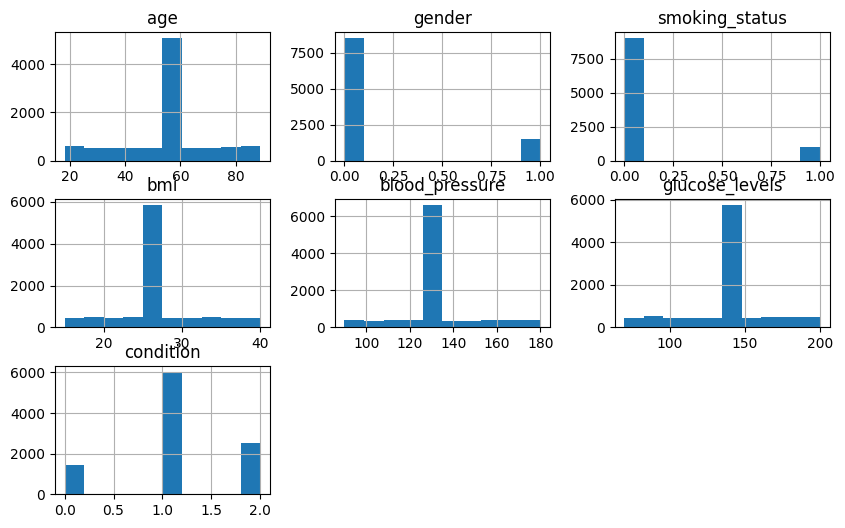

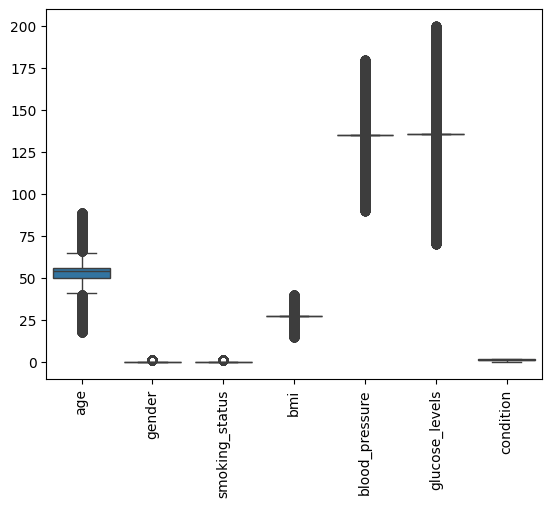

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of numerical features
df.hist(figsize=(10, 6))
plt.show()

# Boxplot for outliers
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()


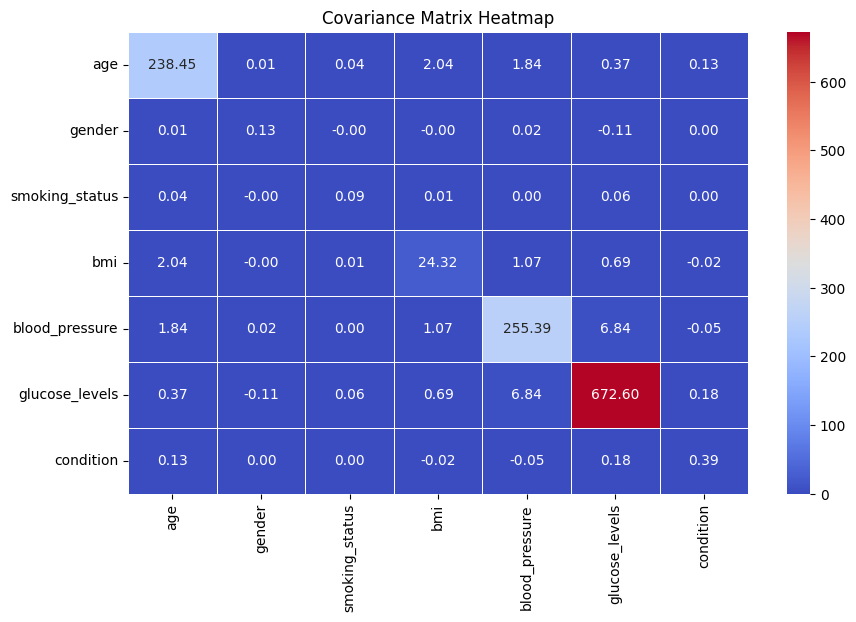

In [30]:
#covariance heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the covariance matrix
cov_matrix = df.cov()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cov_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Covariance Matrix Heatmap")
plt.show()


##### Interpreting the Covariance Matrix

In [31]:
cov_matrix = df.cov()  # Compute covariance matrix

# Define interpretations based on the covariance values
interpretations = {
    "Age & BMI": (cov_matrix.loc["age", "bmi"], 
                  "Positive covariance → Older people tend to have slightly higher BMI."),
    
    "Blood Pressure & Glucose Levels": (cov_matrix.loc["blood_pressure", "glucose_levels"], 
                                        "Positive covariance → Higher blood pressure is linked to higher glucose levels."),
    
    "Blood Pressure & Age": (cov_matrix.loc["age", "blood_pressure"], 
                             "Positive covariance → Older people tend to have higher blood pressure."),
    
    "Glucose Levels & Condition": (cov_matrix.loc["glucose_levels", "condition"], 
                                   "Positive covariance → Higher glucose levels might be related to some medical condition."),
    
    "BMI & Condition": (cov_matrix.loc["bmi", "condition"], 
                        "Negative but close to 0 → Almost no relationship.")
}

# Print interpretations
for key, (value, explanation) in interpretations.items():
    print(f"{key} ({value:.2f}): {explanation}")


Age & BMI (2.04): Positive covariance → Older people tend to have slightly higher BMI.
Blood Pressure & Glucose Levels (6.84): Positive covariance → Higher blood pressure is linked to higher glucose levels.
Blood Pressure & Age (1.84): Positive covariance → Older people tend to have higher blood pressure.
Glucose Levels & Condition (0.18): Positive covariance → Higher glucose levels might be related to some medical condition.
BMI & Condition (-0.02): Negative but close to 0 → Almost no relationship.


## Normalization of the Numerical Data

In [32]:
#standardization will not work because the missing values were almost 50% in some cols filled with mean median mode.
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns
columns_to_normalize = ['age', 'bmi', 'blood_pressure', 'glucose_levels']

# Apply Min-Max Scaling
scaler = MinMaxScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

print(df.head())  # Check first few rows to verify


        age  gender  smoking_status       bmi  blood_pressure  glucose_levels  \
0  0.507042       0               0  0.496719        0.497961        0.503723   
1  0.169014       0               0  0.496719        0.170080        0.503723   
2  0.000000       0               0  0.824458        0.497961        0.503723   
3  0.507042       0               0  0.496719        0.101236        0.503723   
4  0.816901       0               0  0.496719        0.497961        0.503723   

   condition  
0          2  
1          1  
2          2  
3          2  
4          1  


## Distribution of Data after Normalization

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,10000.0,0.503527,0.217489,0.0,0.450704,0.507042,0.538732,1.0
gender,10000.0,0.149400,0.356500,0.0,0.000000,0.000000,0.000000,1.0
smoking_status,10000.0,0.098600,0.298139,0.0,0.000000,0.000000,0.000000,1.0
bmi,10000.0,0.496719,0.197380,0.0,0.496719,0.496719,0.496719,1.0
blood_pressure,10000.0,0.499587,0.177586,0.0,0.497961,0.497961,0.497961,1.0
glucose_levels,10000.0,0.502928,0.199688,0.0,0.503723,0.503723,0.503723,1.0
condition,10000.0,1.106700,0.622378,0.0,1.000000,1.000000,2.000000,2.0


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'smoking_status'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'blood_pressure'}>,
        <Axes: title={'center': 'glucose_levels'}>],
       [<Axes: title={'center': 'condition'}>, <Axes: >, <Axes: >]],
      dtype=object)

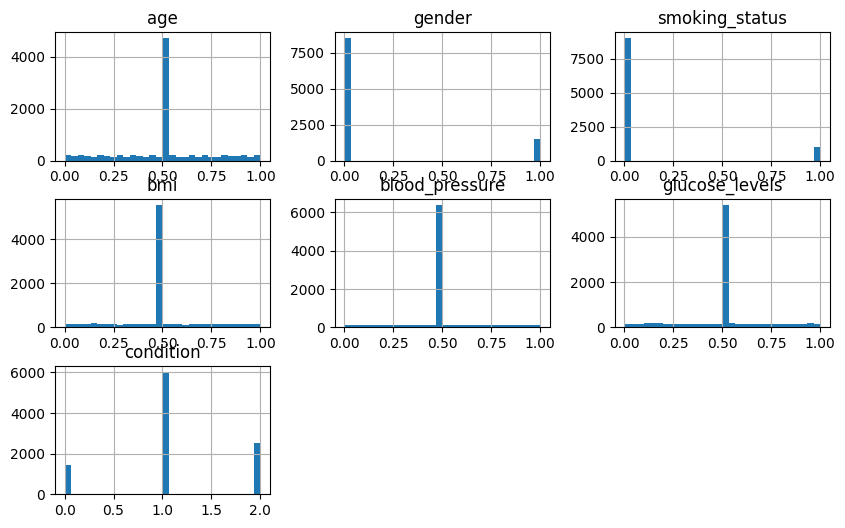

In [34]:
# plotting the histogram
df.hist(figsize=(10,6), bins=30)

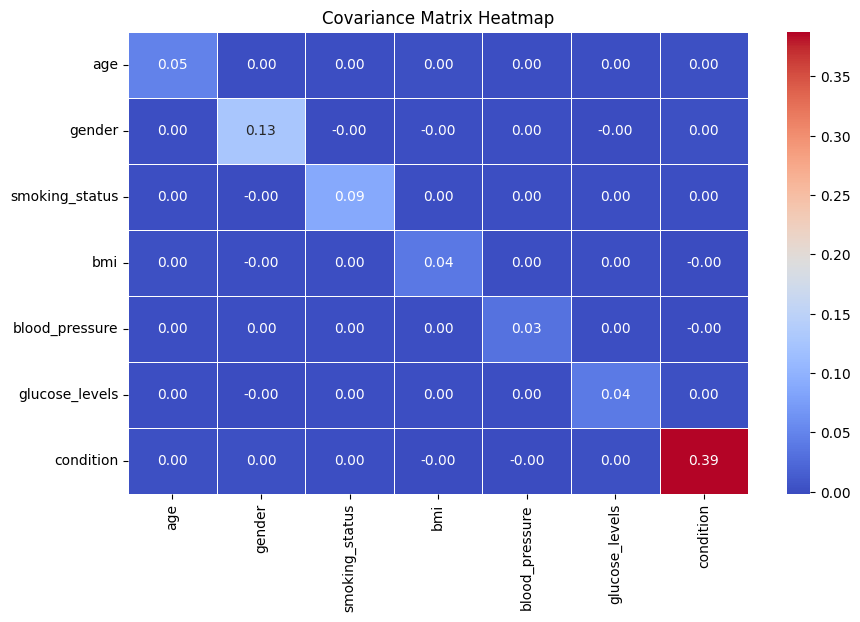

In [17]:
#covariance heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the covariance matrix
cov_matrix = df.cov()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cov_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Covariance Matrix Heatmap")
plt.show()

# Saving the Processed data To apply ML Models

In [18]:
df.to_csv("final_medical_dataset.csv", index=False)